# 決定木

## 参考文献
+ 入門　パターン認識と機械学習


## 概要
木は簡潔かつ理解しやすい構造を持つ。分類や回帰に用いられる木構造を決定木(decision tree)がある。特に分類問題で使う決定木は**分類木**、回帰問題では**回帰木**と呼ばれる。2進木の決定木を用いた学習アルゴリズムである**CART**(classification and regression trees)を説明する。

## 木構造の用語
+ ノード・節点：図7.2の丸および四角
+ 中間ノード：丸のノード
+ 葉ノード：四角のノード
+ エッジ・枝：ノード間を結んでいる線分
    葉ノードからは下に枝が伸びていない。
+ ルートノード・根ノード：最も上にあるノード
+ 子ノード：任意の中間ノードについて、そのノードから下に直接枝で結ばれたノード
+ 親ノード：子ノードの元の中間ノード


## 分類木と回帰木
特徴ベクトル$x=(x_1, x_2, \cdots ,x_d)~T \quad (x_i \in R)$および目的変数$y$について考える。

### 分類木
例として2次元の特徴ベクトルを持ち、$c_1=A,x_2=B,c_3=C$の３つのクラスが存在するとする。  
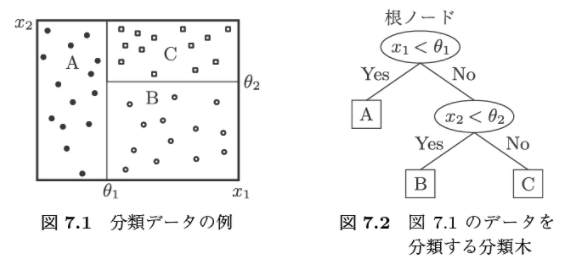  
図7.1において、$\theta _1$および$\theta_2$はある定数を表している。図7.1のデータを分類する分類木が図7.2である。

分類木は根ノードからスタートし、中間ノードにおいて特徴量の大小関係で分岐し、葉ノードのラベルにより分類を行う。

### 回帰木
分類木との違いは葉ノードのラベルだけである。分類問題では出力がクラスであるが、回帰では目的変数$y$の推定値である。
![](https://cdn.discordapp.com/attachments/633986787529981975/955788399384612874/2022-03-22_20.21.48.png)

そこで、回帰木の葉ノードにはその葉における目的変数の推定値$\hat{y}_A,\hat{y}_B,\hat{y}_C$が書かれている。

> この回帰木のモデルでは、線形回帰モデル$\hat{y}=\beta_0 + \beta_1 x_1+\beta_2 x_2$では表現できない$x_1$と$x_2$の組み合わせ効果(交互作用)が表現できる。　そうなの？？

このような決定木モデルは、変数間に交互作用がある問題に対して有効な分類器となる。問題は、どのように学習データから有効な決定木モデルを構築するか(学習方法)。理解が容易かつ学習の計算量も優れているCARTを学ぶ。

## 分類木の学習法
$n$組の学習データ$(x_1,y_1),(x_2,y_2),\cdots,(x_n,y_n)$が与えられている。ここで、$i$番目の学習データの特徴ベクトルは$x_i=(x_{i1},x_{i2},x_{id})^T$と表される。Mクラスが存在するとし、$C=\{c_1,c_2,\cdots, c_M \}$として、$y_i\in C$のようにクラスが与えられるとする。

分類木の学習では、図7.2示したように各中間ノードに対して$x_j < \theta_j$のような条件を設定する。すなわち、特徴ベクトルの**属性番号(インデックス)**と閾値$\theta_j$を設定する必要がある。また、葉ノードに対してはクラス$y\in C$を割り当てることが目的である。

各ノードには番号を割り当てるものとし、根ノードの番号を1とする。ノード番号1,すなわち根ノードに割り当てる学習データ番号の集合を$\iota_1$とし、$\iota_1=\{1,2,\cdots,n \}$とする。根ノードには前学習データを割り当てる。同様に、ノード番号$r$のノードに割り当てられる学習データ番号の集合を$\iota_r$とする。$\iota_r$のなかでクラスが$y\in C$である学習データの割合を$P(y|\iota_r)$とする。すなわち、
$$
P(y|\iota_r)=\frac{|\{ i\in \iota_r | y_i = y \}|}{|\iota_r|}
$$

と定義する。ただし、集合Aに対して$|A|$はAの要素数を表すものとする。このとき、$\iota_r$中の学習データにおける**不純度(impurity)**を$I(\iota_r)$で示す。例えば、**エントロピー**
$$
I(\iota_r)=-\sum_{y\in C} P(y|\iota_r)\log_2 P(y|\iota_r)
$$
や**Gini関数**
$$
I(\iota_r)=1-\sum_{y\in C}(P(y|\iota_r))^2
$$
などが利用される。また、**誤分類率**
$$
I(\iota_r)=1-\max_{y \in C} P(y|\iota_r)
$$
が用いられることもある。$I(\iota_r)$は$\iota_r$中のクラスの偏り具合を示す関数であり、特定のクラスのデータばかりであるほど０に近く、どのクラスも均等に存在する場合に大きな値を取る。

これらの性質は$I(\iota_r)$を$P(y|\iota_r)$で微分するとわかりやすい。

![](https://cdn.discordapp.com/attachments/633986787529981975/955886056320954368/2022-03-23_2.49.52.png)

図7.4に$M=2$
















